In [7]:
import pandas as pd 

from sklearn.model_selection import train_test_split

# Load pand split data
df = pd.read_csv(r'C:\Users\willi\VsCodeProjects\AI-Audio-Analysis-AI4ALL\Data\IRMAS_features_2_sec.csv')
x = df.drop(columns=["file_name", "label"])
y = df["label"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) #80% Training, 20% testing

print(f"Training set size: {x_train.shape}")
print(f"Test set size: {x_test.shape}")

Training set size: (5364, 183)
Test set size: (1341, 183)


In [8]:
import tensorflow as tf
from keras import layers, models
from sklearn.preprocessing import LabelEncoder

#Encode labels into numeric values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

#simple neural network model definition
model = models.Sequential([
    layers.Dense(128, input_shape=(x_train.shape[1],), activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(label_encoder.classes_), activation='softmax') #output layer
])
#Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Train the model
history = model.fit(x_train, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)

#Evaluate model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test_encoded)
print(f"Test Accuracy: {test_accuracy:.4f}")

c:\Users\willi\VsCodeProjects\AI-Audio-Analysis-AI4ALL\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1455 - loss: 72.4792 - val_accuracy: 0.1705 - val_loss: 13.0470
Epoch 2/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2271 - loss: 9.0047 - val_accuracy: 0.1873 - val_loss: 13.5188
Epoch 3/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3015 - loss: 7.2255 - val_accuracy: 0.1016 - val_loss: 22.5187
Epoch 4/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2860 - loss: 8.8979 - val_accuracy: 0.3010 - val_loss: 4.7477
Epoch 5/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3358 - loss: 5.3803 - val_accuracy: 0.2414 - val_loss: 9.9196
Epoch 6/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3145 - loss: 6.5097 - val_accuracy: 0.2833 - val_loss: 7.1836
Epoch 7/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3856 - loss: 4.4246 - val_accuracy: 0.2488 - val_loss: 10.7120
Epoch 8/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3384 - loss: 6.1662 - val_accura

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

#Model evaluation
y_pred = np.argmax(model.predict(x_test), axis=1) #predictions on test set
print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_)) #Generate calssification report
print(confusion_matrix(y_test_encoded, y_pred)) #Confusion matrix

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
                 precision    recall  f1-score   support

acoustic guitar       0.54      0.35      0.42       147
          cello       1.00      0.02      0.03        65
       clarinet       0.31      0.47      0.37       115
electric guitar       0.22      0.78      0.35       153
          flute       0.21      0.56      0.31        86
          organ       1.00      0.01      0.01       145
          piano       0.41      0.44      0.42       142
      saxophone       0.23      0.03      0.05       114
        trumpet       0.47      0.19      0.27       119
         violin       0.50      0.23      0.31       109
          voice       0.74      0.18      0.29       146

       accuracy                           0.31      1341
      macro avg       0.51      0.29      0.26      1341
   weighted avg       0.51      0.31      0.27      1341

[[ 51   0  19  46  14   0   9   3   1   3   1]
 [  5   1  14  15  21   0   4   0   1   4   0]
 [  3   0

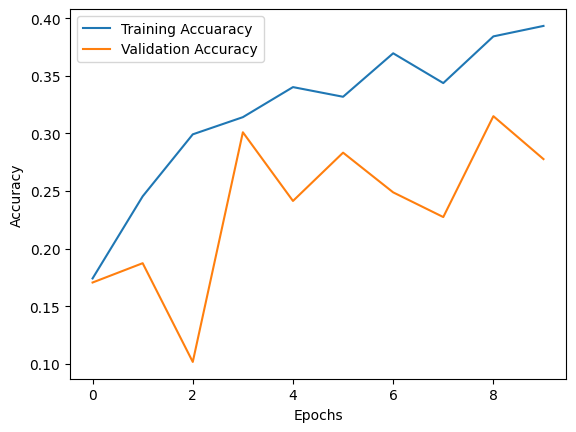

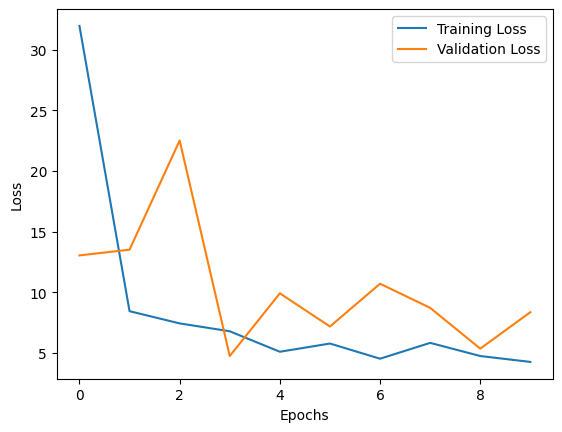

In [10]:
import matplotlib.pyplot as plt

#Plot Accuracy
plt.plot(history.history['accuracy'], label='Training Accuaracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Plot Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
#Save trained model in Keras Format
model.save('Instrument_model.keras')

# Save the label encoder classes (the instrument classes)
import numpy as np
np.save('Instrument_classes.npy', label_encoder.classes_)